# <font color = green>Aula 1 - Tendência das Vendas

## <font color = blackpink>Análise Das Vendas

In [80]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [81]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [82]:
alucar = pd.read_csv('alucar.csv')

In [83]:
print(f'quantidade de linhas e colunas: {alucar.shape}')

quantidade de linhas e colunas: (24, 2)


In [84]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [85]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [86]:
alucar.mes = pd.to_datetime(alucar.mes)

In [87]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [88]:
sns.__version__

'0.11.2'

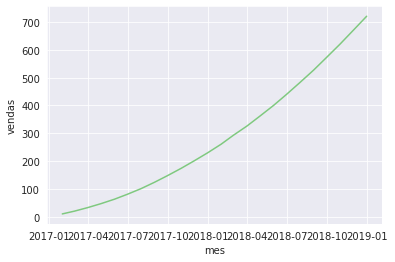

In [89]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

---

## <font color = blackpink>Aperfeiçoando o gráfico

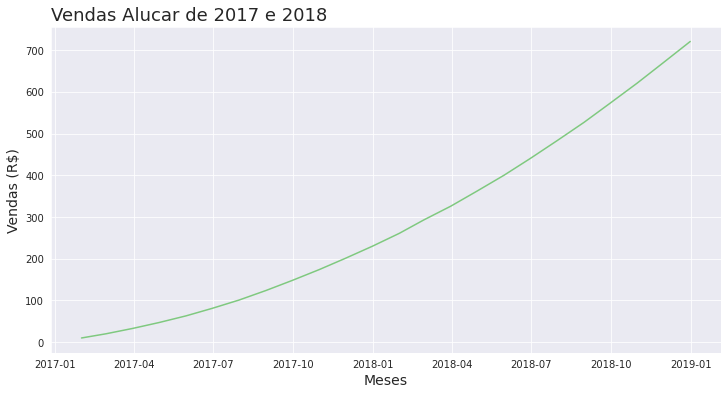

In [90]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

---
---

# <font color = green>Aula 2 – Decomposição e Autocorrelação

## <font color = blackpink>Decompondo As Vendas

In [91]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [92]:
alucar['aumento'] = alucar.vendas.diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


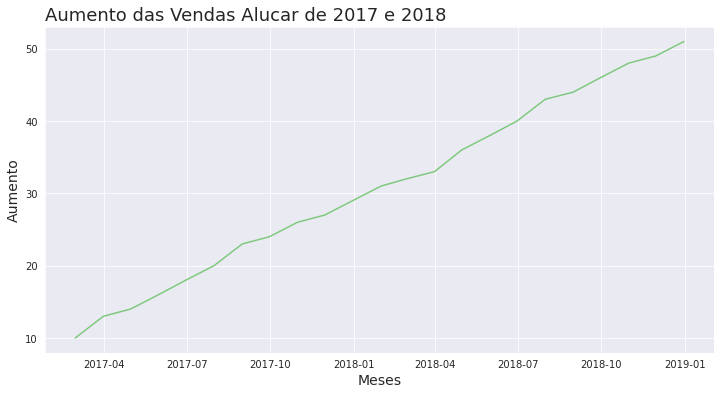

In [93]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [94]:
def plotar(titulo: str, labelx: str, labely: str, x: str, y: str, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

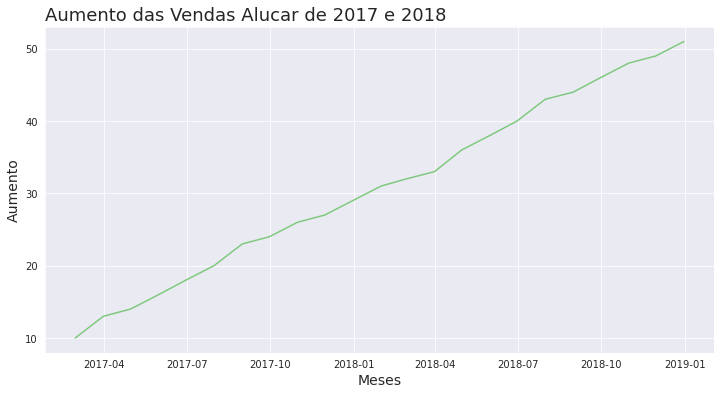

In [95]:
plotar('Aumento das Vendas Alucar de 2017 e 2018', 'Meses', 'Aumento', 'mes', 'aumento', alucar,)

In [96]:
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


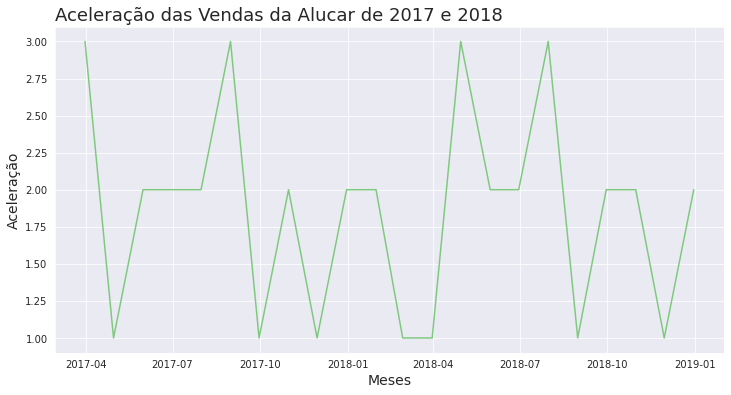

In [97]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018', 'Meses', 'Aceleração',
       'mes', 'aceleracao', alucar)

---

## <font color = blackpink>Observação e tendência

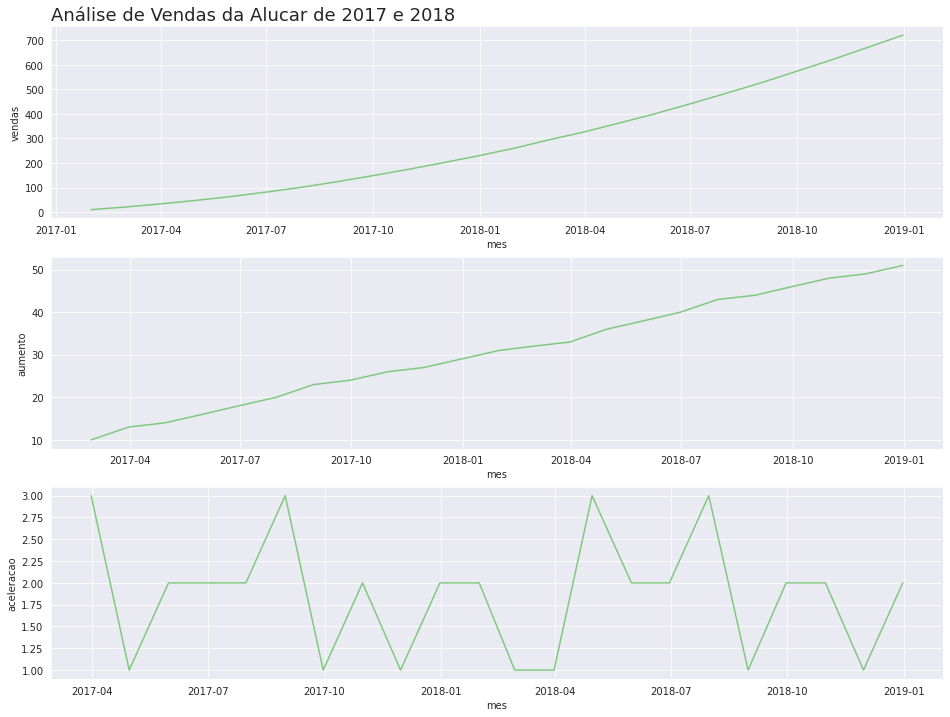

In [98]:
plt.figure(figsize = (16, 12))      # Seta o tamanho da imagem
ax = plt.subplot(3, 1, 1)     # Atribui o subplot a ax e seta a loc do primeiro gráfico
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018',
             fontsize = 18, loc = 'left')   # Seta título, fonte e localização
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)  # Primeiro Gráfico
plt.subplot(3, 1, 2)      # Localização do segundo gráfico, divide em 3 partes, diz que ocupa a parte toda, diz qual é a parte em que plotará
sns.lineplot(x = 'mes', y = 'aumento', data = alucar) # Segundo Gráfico
plt.subplot(3, 1, 3)                # Localização do terceiro gráfico
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)  # Terceiro gráfico
ax = ax

In [99]:
def plot_comparacao(x: str, y1: str, y2: str, y3: str, dataset, titulo: str):
  plt.figure(figsize = (16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax = ax

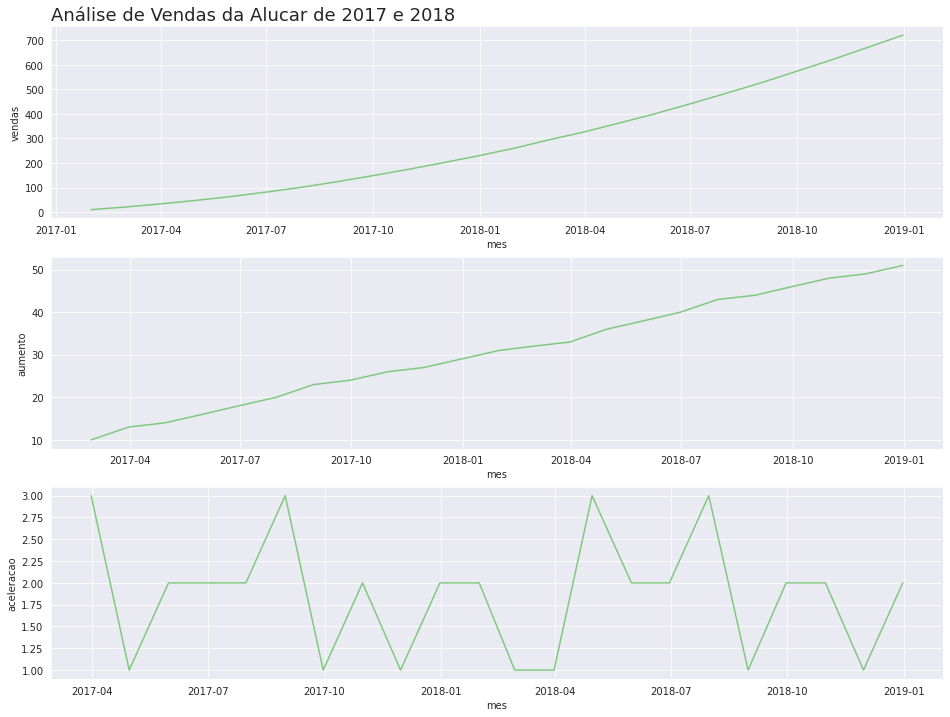

In [100]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Vendas da Alucar de 2017 e 2018')

---

## <font color = blackpink>Autocorrelação

In [101]:
from pandas.plotting import autocorrelation_plot

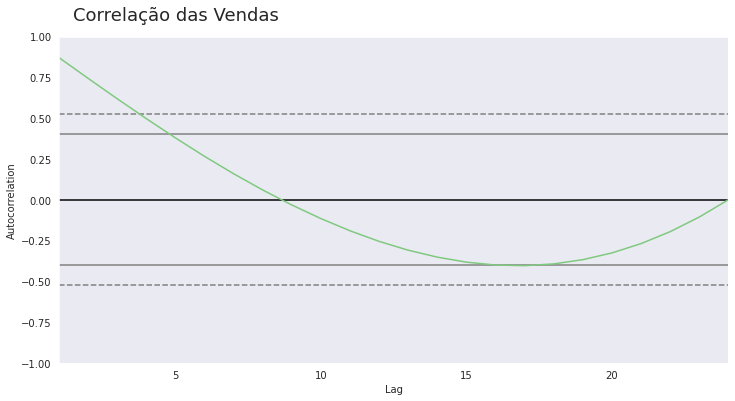

In [102]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.vendas)
ax = ax

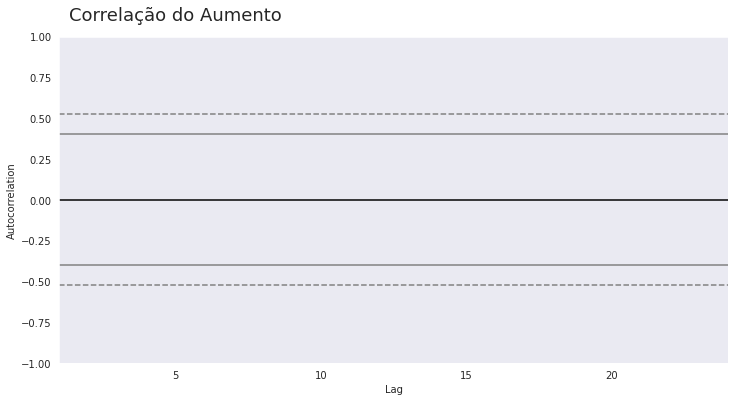

In [103]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.aumento)
ax = ax

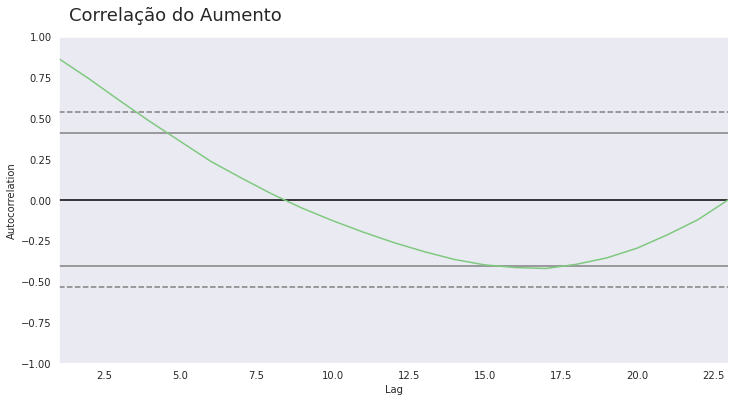

In [104]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.aumento[1:])
ax = ax

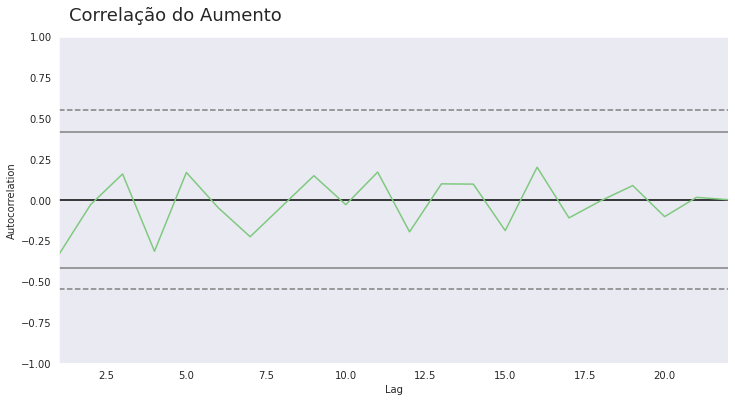

In [105]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

---
---

# <font color = green>Aula 3 – Importância Da Decomposição e Sazonalidade

## <font color = blackpink>Analisando Assinantes

In [106]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [107]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [108]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [109]:
assinantes.mes = pd.to_datetime(assinantes.mes)
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [110]:
print(f'Quantidade de linhas e colunas: {assinantes.shape}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [111]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

In [112]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


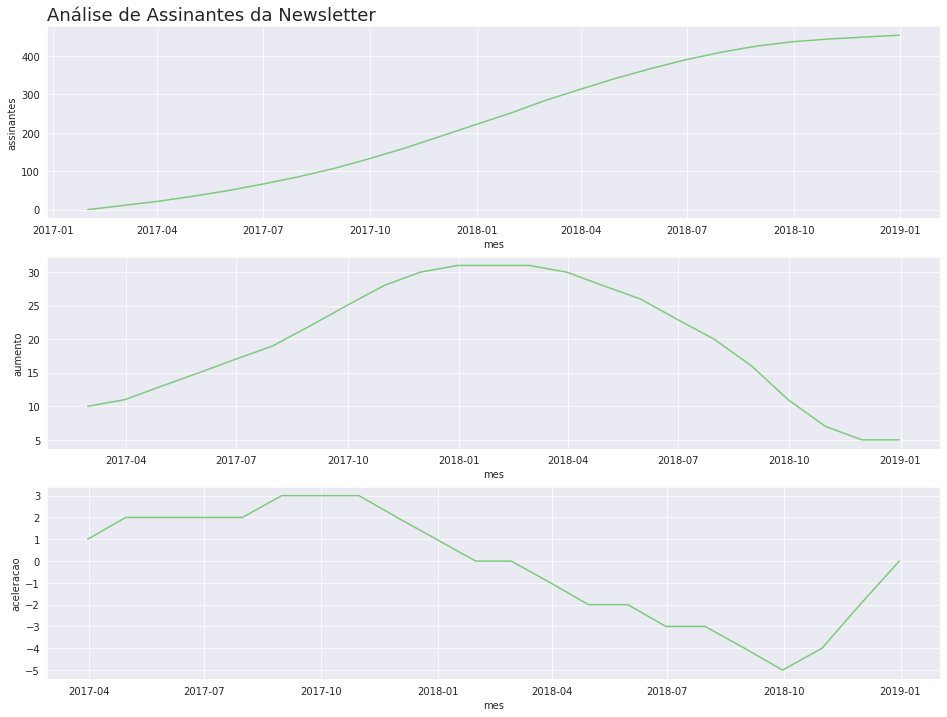

In [113]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de Assinantes da Newsletter')

---

## <font color = blackpink> Sazonalidade e Chocolate

In [114]:
choco = pd.read_csv('chocolura.csv')
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [115]:
choco.dtypes

mes       object
vendas     int64
dtype: object

In [116]:
print(f'Quantidade de linhas: {choco.shape}')
print(f'Quantidade de nulos: {choco.isna().sum().sum()}')

Quantidade de linhas: (24, 2)
Quantidade de nulos: 0


In [117]:
choco.mes = pd.to_datetime(choco.mes)
choco.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [118]:
choco['aumento'] = choco.vendas.diff()
choco['aceleracao'] = choco.aumento.diff()
choco.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


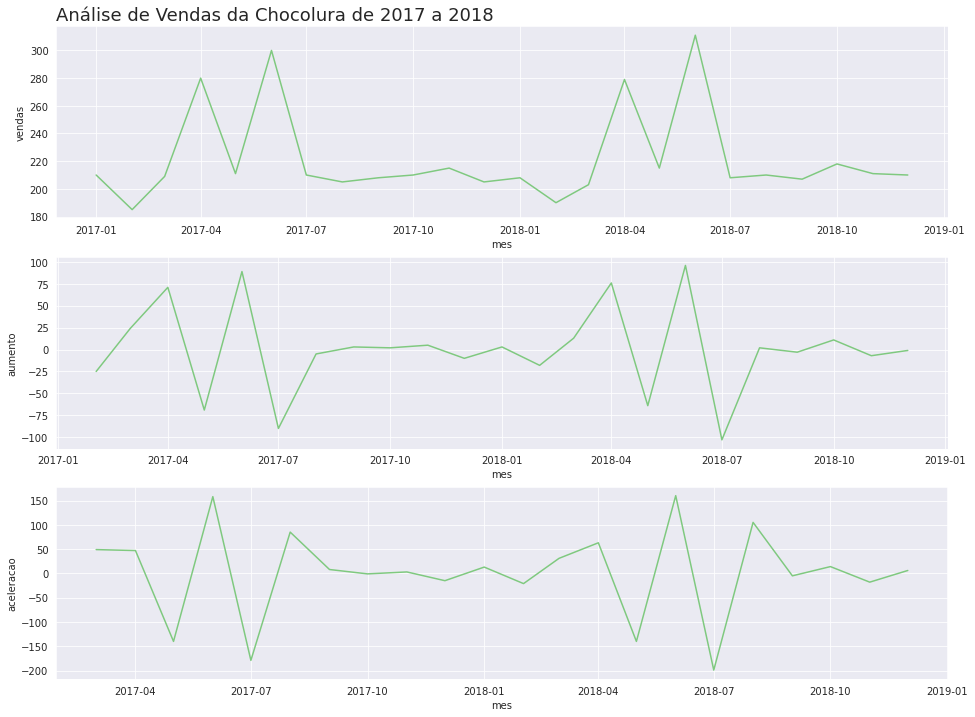

In [119]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', choco, 'Análise de Vendas da Chocolura de 2017 a 2018')

---

## <font color = blackpink>Investigando a Sazonalidade

In [120]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [121]:
print(f'Quantidade de linhas e colunas: {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos:{vendas_por_dia.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos:0


In [122]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [123]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [124]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


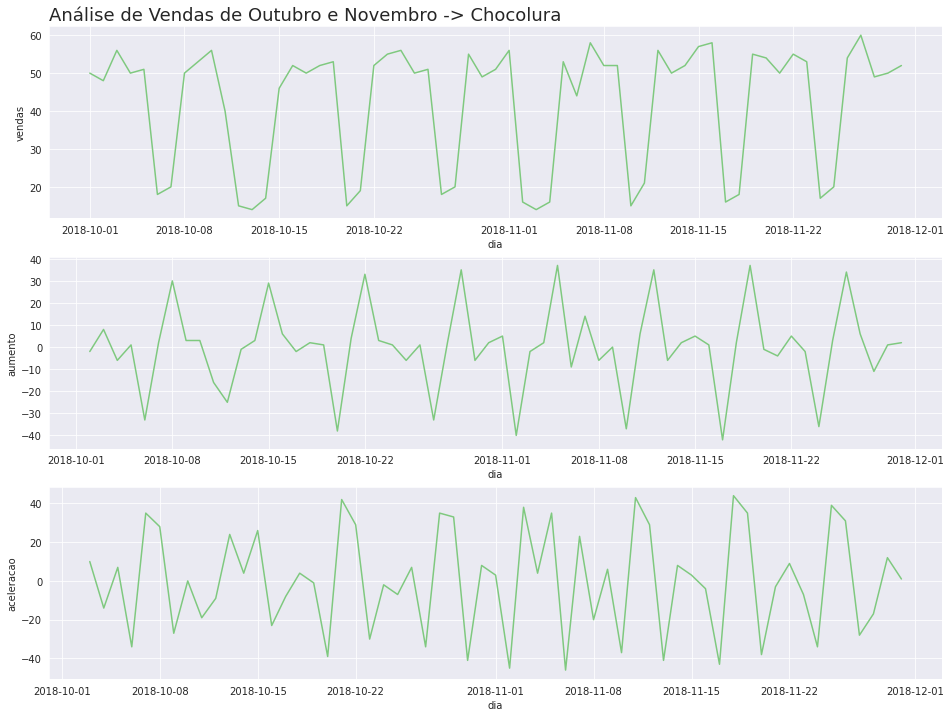

In [125]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia,
                'Análise de Vendas de Outubro e Novembro -> Chocolura')

In [126]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia.dt.day_name()

In [127]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [128]:
vendas_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [129]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta',
                   'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}

vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo


In [130]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


In [131]:
vendas_agrupadas = vendas_por_dia.groupby(vendas_por_dia.dia_da_semana).mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


---
---

# <font color = green>Aula 4 – Normalização e Statsmodels

## <font color = blackpink>Autocorrelação Das Vendas

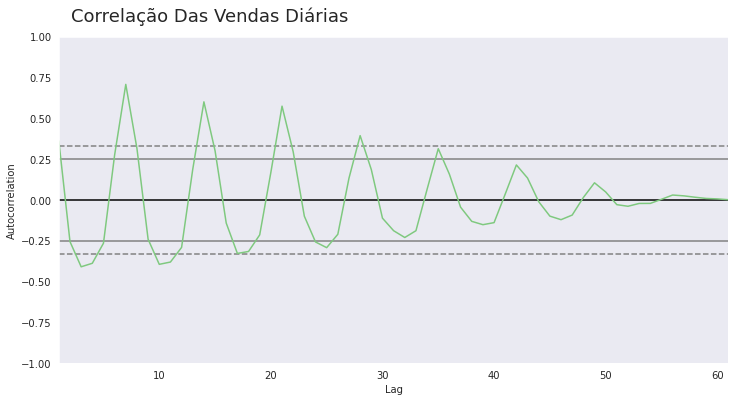

In [132]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação Das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia.vendas)
ax = ax

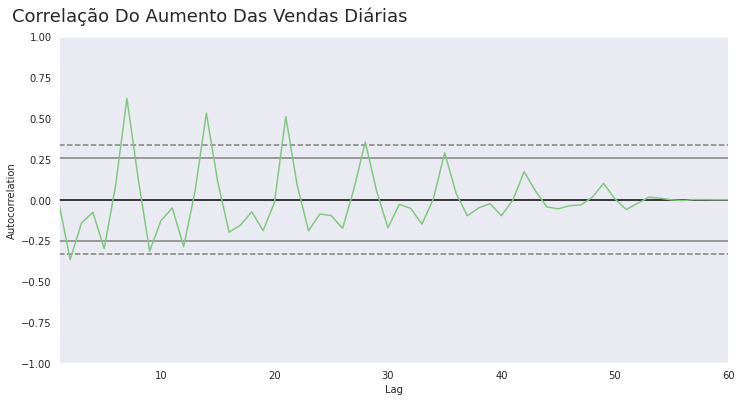

In [133]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação Do Aumento Das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia.aumento[1:])
ax = ax

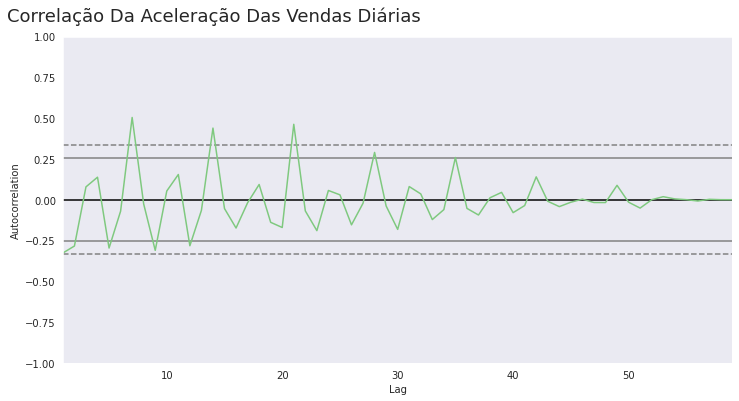

In [134]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação Da Aceleração Das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia.aceleracao[2:])
ax = ax

---

## <font color = blackpink>Normalização

In [135]:
cafe = pd.read_csv('cafelura.csv')
cafe.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [136]:
cafe.dtypes

mes       object
vendas     int64
dtype: object

In [137]:
print(f'Quantidade de Linhas e Colunas: {cafe.shape}')
print(f'Quantidade de dados nulos: {cafe.isna().sum().sum()}')

Quantidade de Linhas e Colunas: (24, 2)
Quantidade de dados nulos: 0


In [138]:
cafe.mes = pd.to_datetime(cafe.mes)
cafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

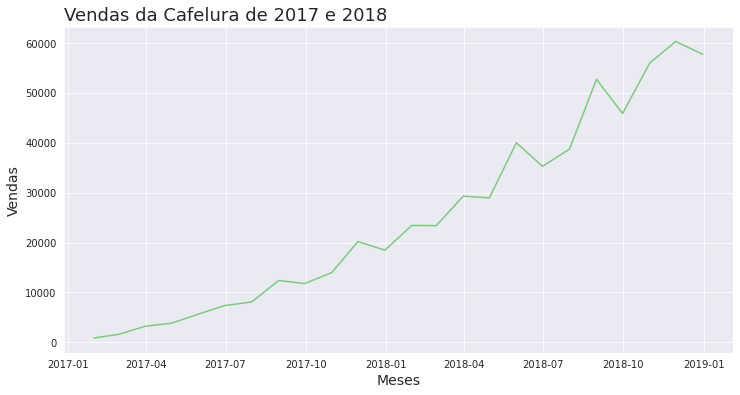

In [139]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Meses', 'Vendas', 'mes', 'vendas', cafe)

In [140]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [141]:
quantidade_de_dias_de_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [142]:
cafe['vendas_normalizadas'] = cafe.vendas / quantidade_de_dias_de_fds.quantidade_de_dias.values
cafe.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


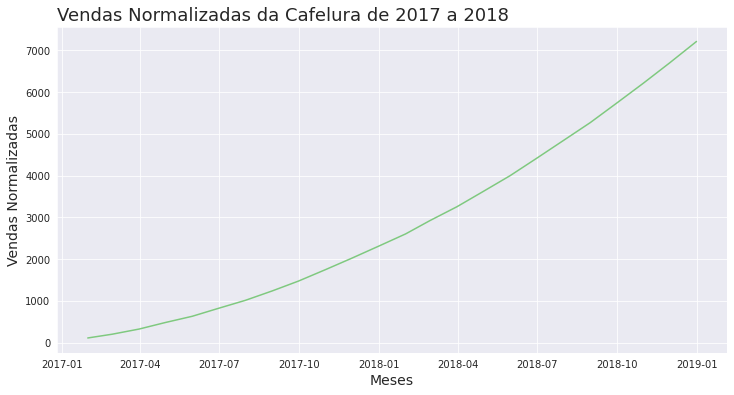

In [143]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018', 'Meses',
       'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafe)

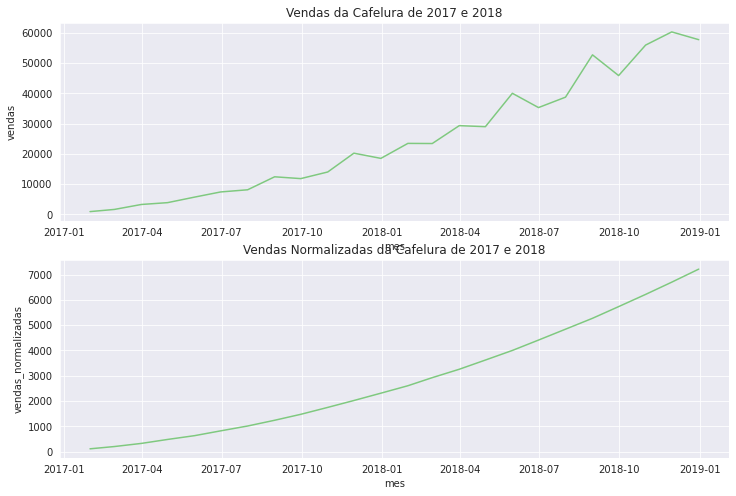

In [144]:
plt.figure(figsize = (12, 8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas da Cafelura de 2017 e 2018')
sns.lineplot(x = 'mes', y = 'vendas', data = cafe)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas da Cafelura de 2017 e 2018')
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafe)
ax = ax

---

## <font color = blackpink>Statsmodel

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose

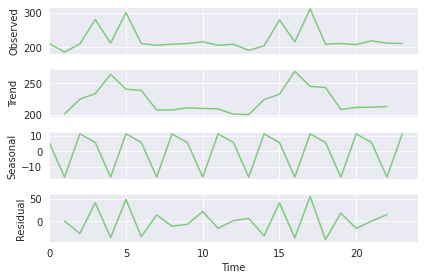

In [146]:
resultado = seasonal_decompose([choco.vendas], freq = 3)
ax = resultado.plot()

In [147]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [148]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


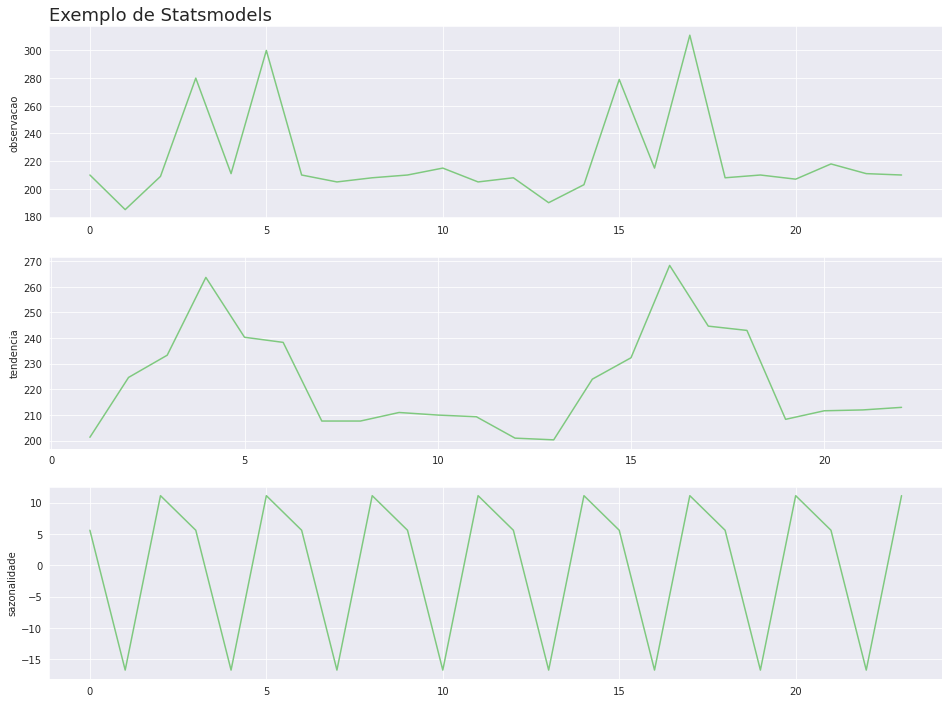

In [149]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

---
---

# <font color = green>Aula 5 – Ruídos e Média Móvel

## <font color = blackpink>Ruído De Uma Time Series

In [150]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [151]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [152]:
print(f'Quantidade de linhas e colunas: {alucel.shape}')
print(f'Quantidade de valores nulos: {alucel.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de valores nulos: 0


In [153]:
alucel.dia = pd.to_datetime(alucel.dia)
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [154]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


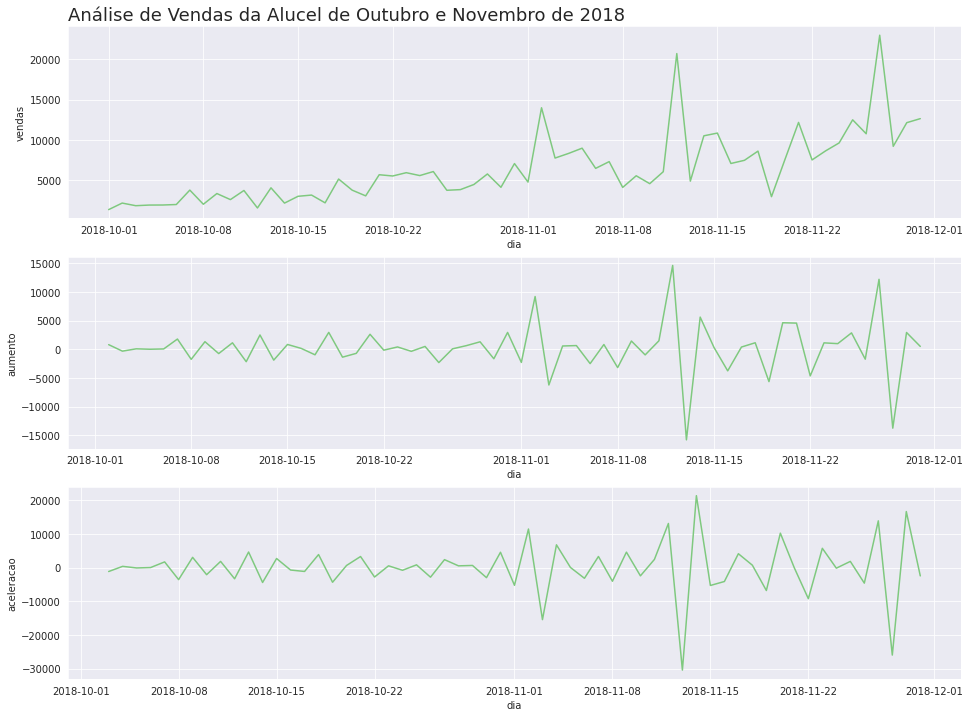

In [155]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de Vendas da Alucel de Outubro e Novembro de 2018')

---

## <font color = blackpink>Média Móvel

In [156]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


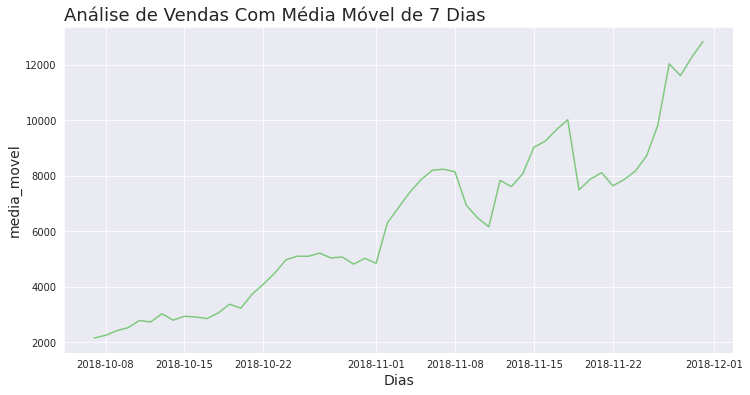

In [157]:
plotar('Análise de Vendas Com Média Móvel de 7 Dias', 'Dias', 'media_movel','dia', 'media_movel', alucel)

In [158]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()

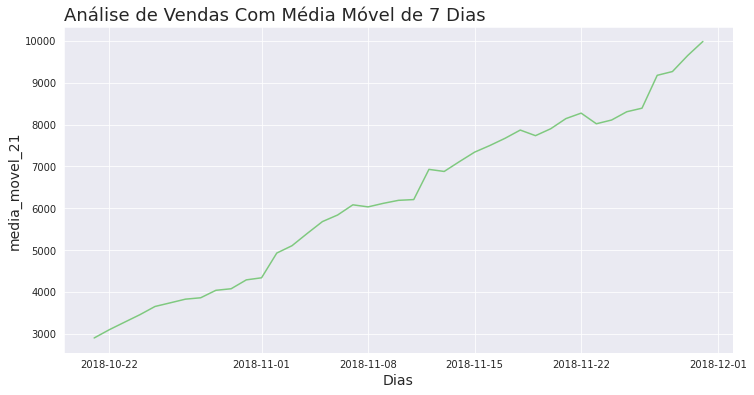

In [159]:
plotar('Análise de Vendas Com Média Móvel de 7 Dias', 'Dias', 'media_movel_21','dia', 'media_movel_21', alucel)

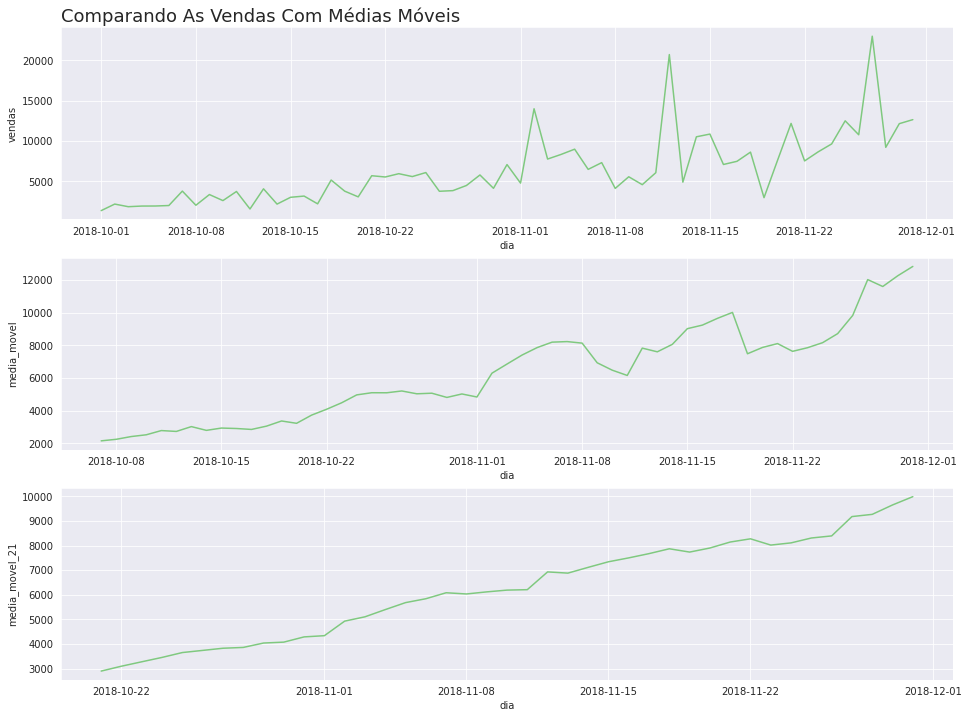

In [161]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel,'Comparando As Vendas Com Médias Móveis')